In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("./all_stocks_5yr.csv") 
df = df[df["Name"] == "AAPL"]

In [68]:
df.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [70]:
df["Name"].unique()

array(['AAPL'], dtype=object)

In [71]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [72]:
df.shape

(1259, 7)

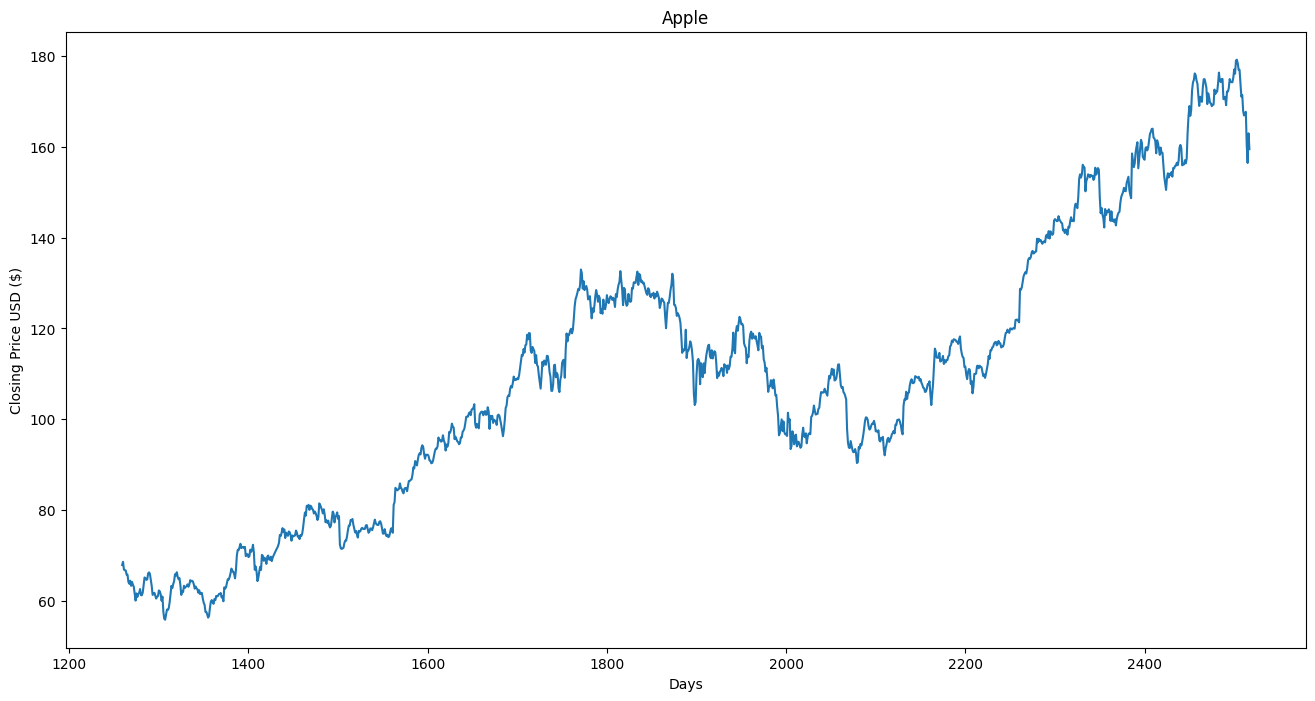

In [73]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [74]:
df2 = df['close']

In [75]:
df2.tail()

2513    167.78
2514    160.50
2515    156.49
2516    163.03
2517    159.54
Name: close, dtype: float64

In [76]:
df2 = pd.DataFrame(df2)     

In [77]:
df2.tail()

,close
2513,167.78
2514,160.50
2515,156.49
2516,163.03
2517,159.54


In [78]:
future_days = 100

df2['Prediction'] = df2['close'].shift(-future_days)

X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [81]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  164.325 158.73  156.07  153.39  151.89  151.89  153.14  169.04
 156.55  155.06  156.55  154.48  153.48  155.39  155.3   155.84  155.9
 156.55  155.06  156.99  173.97  160.47  159.76  159.76  156.25  156.55
 157.1   156.41  157.41  163.05  166.72  169.04  171.85  168.11  172.5
 174.25  167.23  153.14  169.48  174.67  173.97  153.14  169.08  171.1
 170.15  164.325 167.305 174.96  174.97  174.09  157.21  169.48  171.85
 171.05  169.8   169.64  174.54  169.32  169.37  172.67  171.7   172.27
 156.25  173.97  176.42  174.54  174.35  175.01  175.01  170.57  170.6
 171.08  179.1   172.26  172.23  173.03  175.    174.35  174.33  174.29
 175.28  175.01  176.19  179.1   179.26  178.46  177.    177.04  174.22
 171.11  171.11  167.96  167.96  167.43  175.01  160.5   156.49  163.03
 159.54 ]


In [82]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/var/folders/nl/hrx_nbb90fxcym4mk22wtw0w0000gn/T/ipykernel_53270/4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


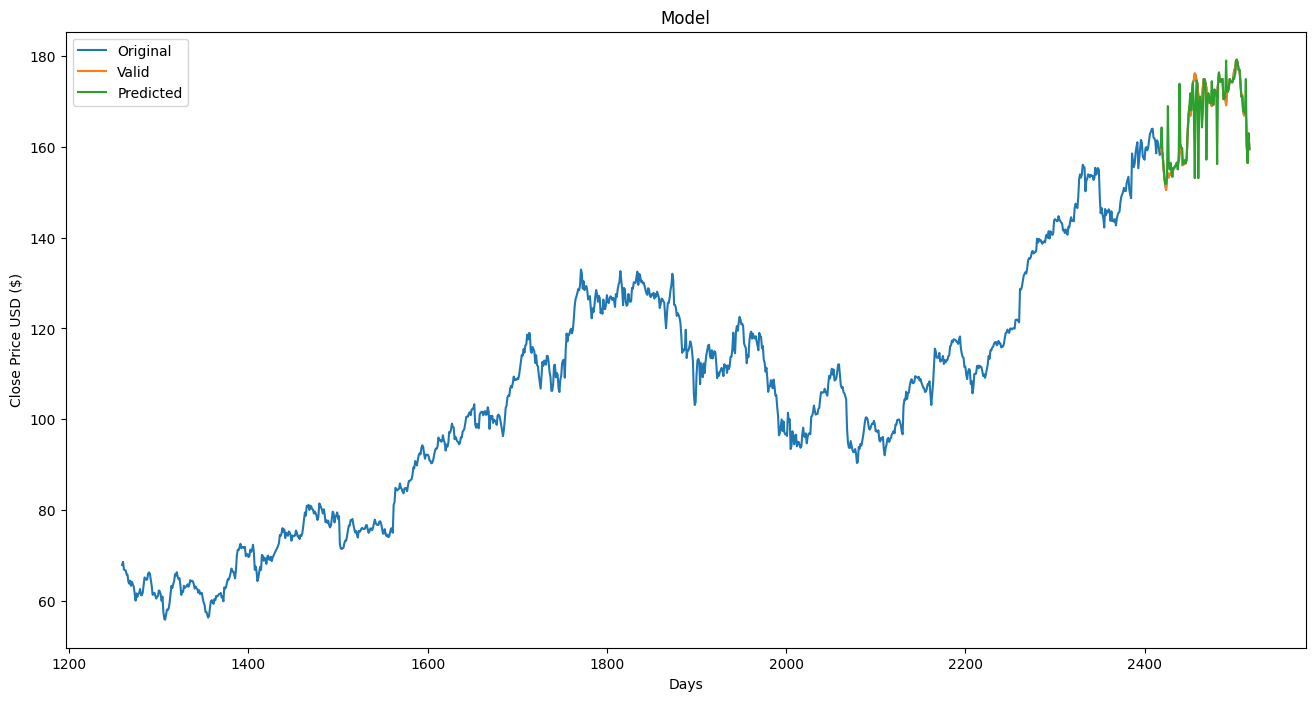

In [83]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()